In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def fvu(y, yhat):
    return np.sum((y - yhat)**2) / np.sum((y - np.mean(y))**2)

In [29]:
def ground_truth(x):
    return np.exp(-x * 0.5) * np.cos(2 * x)

/tmp/ipykernel_10773/1360460679.py:22: RuntimeWarning: divide by zero encountered in log10
  ax.plot(x, fit(x), 'r', label=f'Fit (log FVU = {np.log10(fvu(y, fit(x))):.2f})')


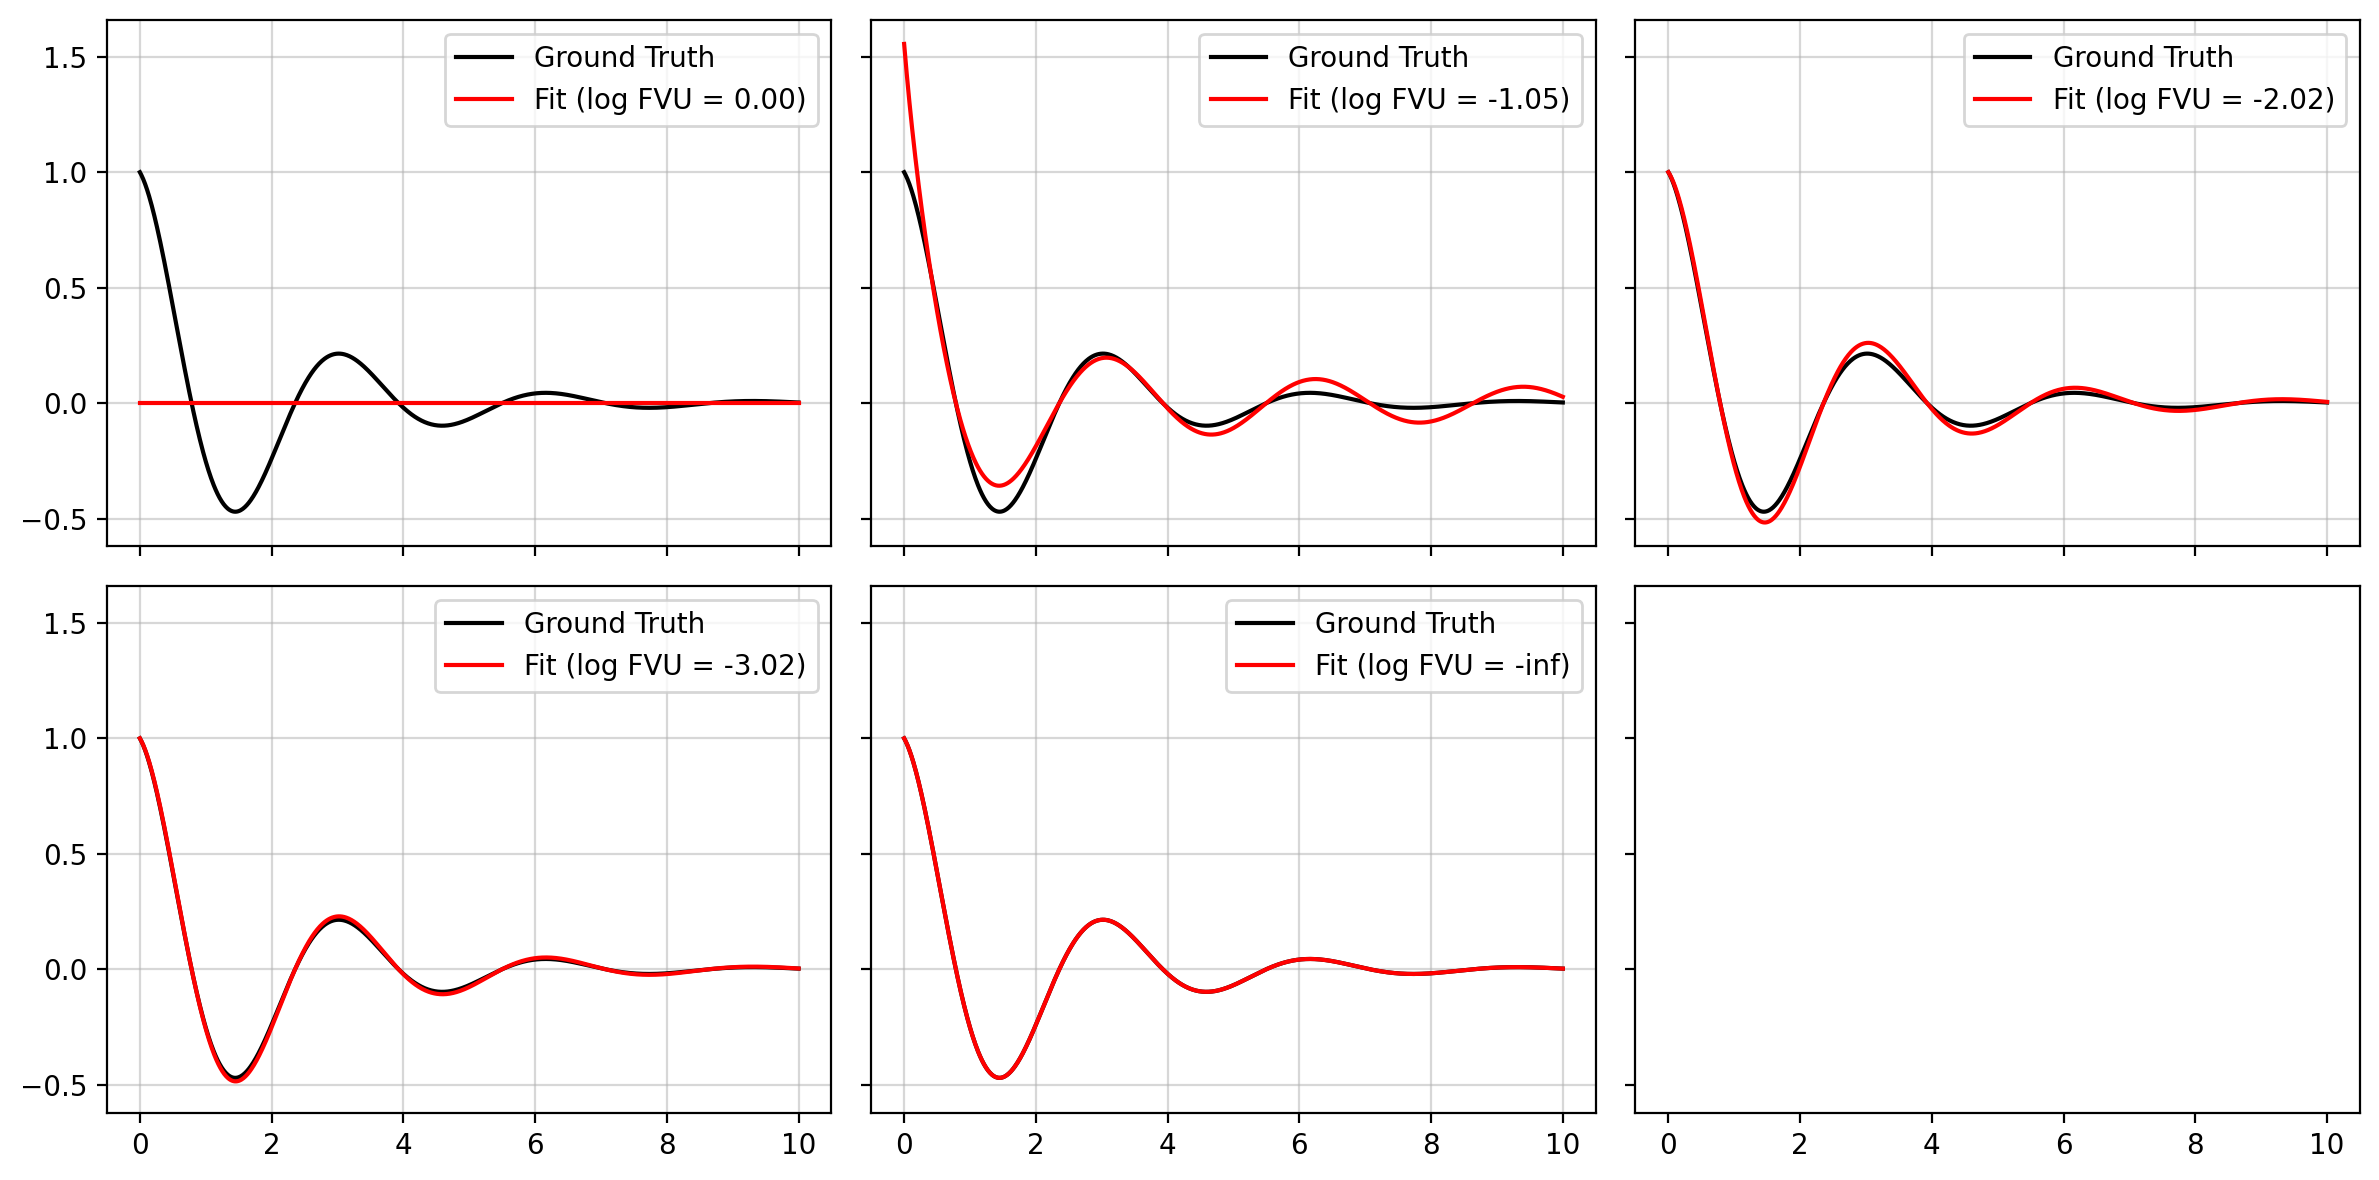

In [71]:
possible_fits = [
    lambda x: np.zeros_like(x),
    lambda x: 1 / (x + 0.45) * np.cos(2 * x) * 0.7,
    lambda x: np.exp(-x * 0.435) * np.cos(2 * x),
    lambda x: np.exp(-x * 0.478) * np.cos(2 * x),
    lambda x: np.exp(-x * 0.5) * np.cos(2 * x)
]

COLS = min(3, len(possible_fits))
ROWS = np.ceil(len(possible_fits) / COLS).astype(int)

fig, axes = plt.subplots(ROWS, COLS, figsize=(COLS * 4, ROWS * 3), dpi=200, sharex=True, sharey=True)

axes = np.atleast_2d(axes)

# plot ground truth
x = np.linspace(0, 10, 1000)
y = ground_truth(x)

for ax, fit in zip(axes.flat, possible_fits):
    ax.plot(x, y, 'k', label='Ground Truth')
    ax.plot(x, fit(x), 'r', label=f'Fit (log FVU = {np.log10(fvu(y, fit(x))):.2f})')
    ax.legend()
    ax.grid(alpha=0.5)

fig.tight_layout()